<a href="https://colab.research.google.com/github/sarthakviche/eda_housePrices/blob/main/eda_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#all dependencies in one place

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/eda_housePrices/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
print(df.shape)
print(" \n ___________________________________________  \n")
print(df.info())
print(" \n ___________________________________________  \n")
df.head()


(1460, 81)
 
 ___________________________________________  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   obje

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#EDA for IEEE


Missing Values:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


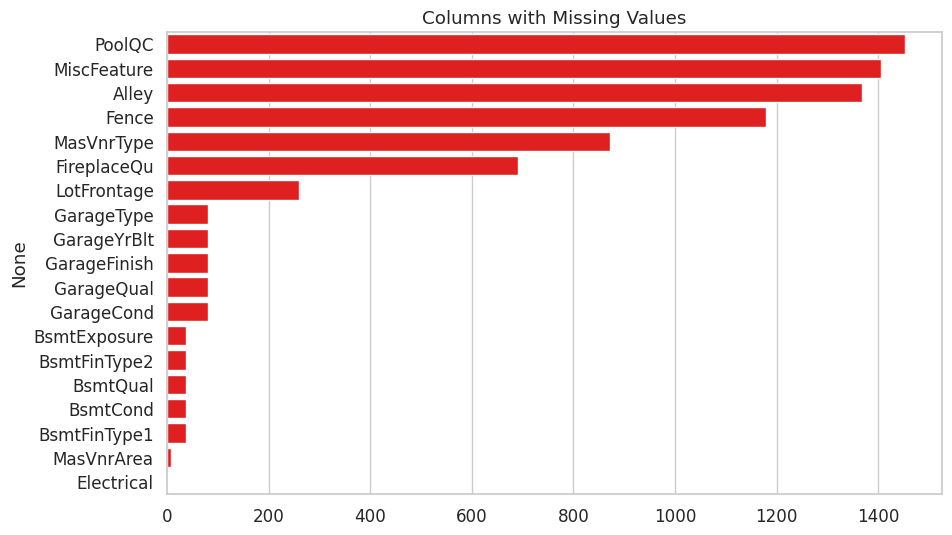

In [17]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nMissing Values:\n", missing)

plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index, color="red")
plt.title("Columns with Missing Values")
plt.show()


So from this we can conclude that According to the graph that we have gotten we can conclude that these are the features or these are the columns with the most number of missing values so now it is our call whether do we remove these columns as it is because at the end it makes sense to remove columns like pool qc who have over 1400 missing values like why is it there in the first place?

In [13]:
print("\nNumerical Summary:\n", df.describe())


Numerical Summary:
                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.06

In [14]:
df.shape

(1460, 81)

In [18]:
print("\nCategorical Summary:\n", df.describe(include=['O']))

# Example of mean, median, mode for a key column
print("LotArea → Mean:", df['LotArea'].mean())
print("LotArea → Median:", df['LotArea'].median())
print("LotArea → Mode:", df['LotArea'].mode()[0])


Categorical Summary:
        MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top        

In [19]:
categorical_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour']
le = LabelEncoder()

for col in categorical_cols:
    df[col] = df[col].astype(str)  # in case of NaN
    df[col] = le.fit_transform(df[col])

print("\nEncoded columns sample:\n", df[categorical_cols].head())


Encoded columns sample:
    MSZoning  Street  LotShape  LandContour
0         3       1         3            3
1         3       1         3            3
2         3       1         0            3
3         3       1         0            3
4         3       1         0            3


In [20]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

outliers = detect_outliers_iqr(df, "GrLivArea")
print("\nOutliers in GrLivArea:", outliers.shape[0])



Outliers in GrLivArea: 31


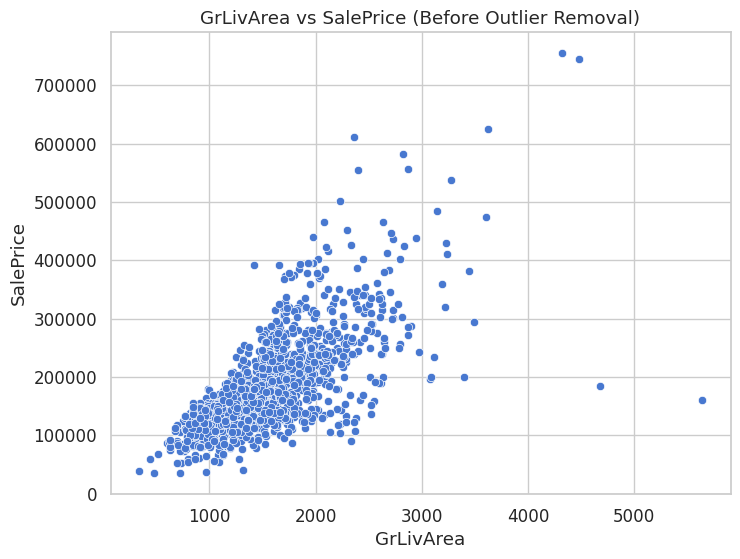

In [21]:
# Plot before removing outliers
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title("GrLivArea vs SalePrice (Before Outlier Removal)")
plt.show()


In [22]:
df_no_outliers = df.drop(outliers.index)

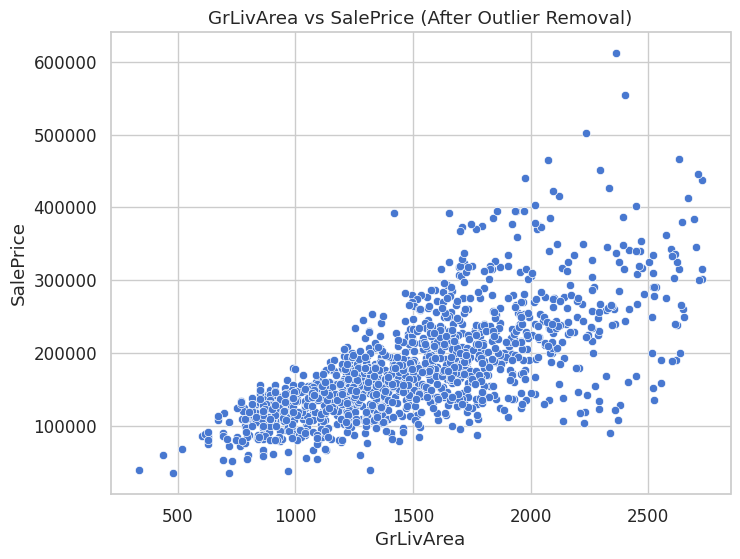

In [23]:
# Plot after removing outliers
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_no_outliers['GrLivArea'], y=df_no_outliers['SalePrice'])
plt.title("GrLivArea vs SalePrice (After Outlier Removal)")
plt.show()

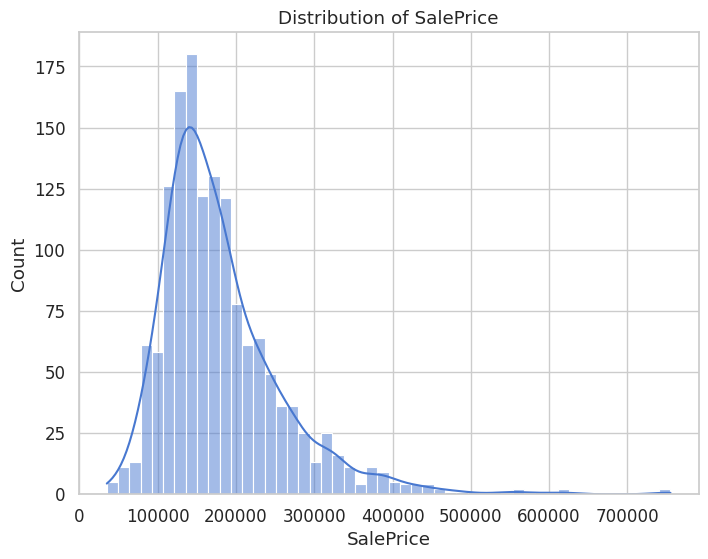

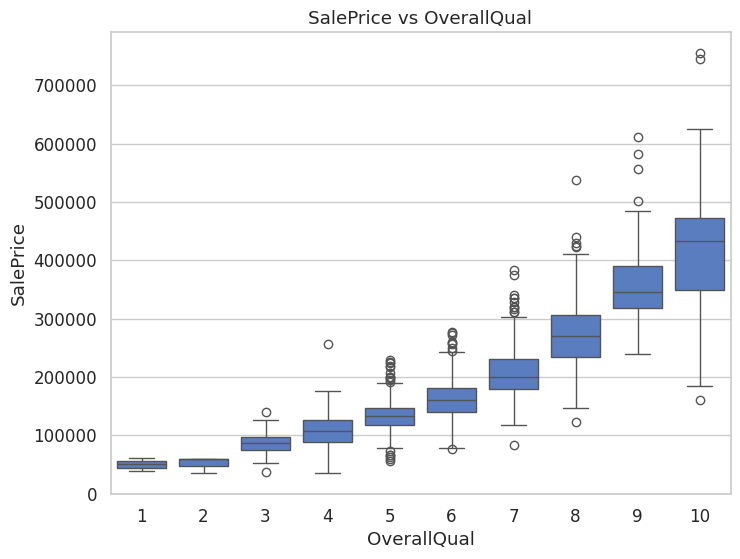

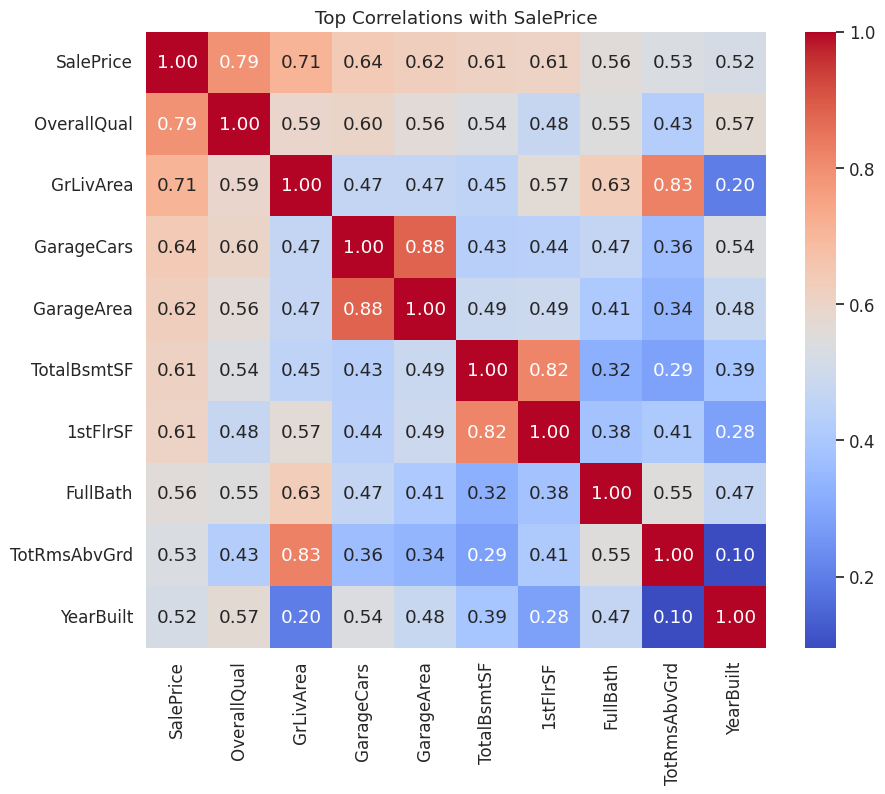

In [24]:
# Univariate: Histogram of SalePrice
plt.figure(figsize=(8,6))
sns.histplot(df['SalePrice'], bins=50, kde=True)
plt.title("Distribution of SalePrice")
plt.show()

# Bivariate: SalePrice vs OverallQual
plt.figure(figsize=(8,6))
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title("SalePrice vs OverallQual")
plt.show()

# Correlation Heatmap (top 10 features with SalePrice)
corr = df.corr(numeric_only=True)
top_corr = corr['SalePrice'].abs().sort_values(ascending=False).head(10).index
plt.figure(figsize=(10,8))
sns.heatmap(df[top_corr].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top Correlations with SalePrice")
plt.show()

In [25]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1168, 80)
Test shape: (292, 80)


#Kaggle Compitition

In [26]:
print("hello World")

hello World


# GIT

In [27]:
!git clone https://github.com/sarthakviche/eda_housePrices.git

Cloning into 'eda_housePrices'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [28]:
%cd /content/eda_housePrices
!ls

/content/eda_housePrices
README.md


In [30]:
!mkdir notebooks
!mv /content/eda_house_prices.ipynb notebooks/


mv: cannot stat '/content/eda_house_prices.ipynb': No such file or directory
